In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *


from PIL import Image
from numpy import array

import skimage
import time

import cv2
import numpy as np

from torchvision.utils import save_image
import torch

In [3]:
def segs2onehot(frame, nchannels):
    """
    Converts a tensor of shape (1, imgx, imgy)
    with discrete values in the range(nchannels)
    to a onehot style tensor of shape (nchannels, imgx, imgy)
    """
    *_, nx, ny = frame.shape
    x,y = np.meshgrid(np.arange(nx), np.arange(ny))
    res = np.zeros((nchannels, nx, ny))
    res[frame.T.ravel(), x.ravel(), y.ravel()] = 1
    return res

## Import an image

- Convert to a tensor (at some point)

In [4]:
im = cv2.imread('/home/jupyter/.fastai/data/camvid/segmentedImages/segImage1.png')

In [33]:
im.shape

(360, 480, 3)

In [6]:
*_, nx, ny = im.shape

In [34]:
print("nx", nx)
print("ny", ny)

nx 480
ny 3


In [7]:
x,y = np.meshgrid(np.arange(nx), np.arange(ny))

In [43]:
res = np.zeros((1, nx, ny))

In [44]:
x.shape

(3, 480)

In [45]:
y.shape

(3, 480)

In [46]:
im.shape

(360, 480, 3)

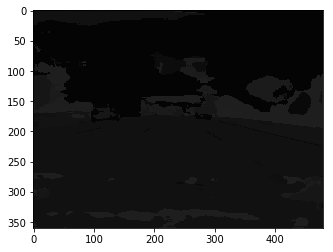

In [47]:
plt.imshow(im)

In [48]:
res.shape

(1, 480, 3)

In [49]:
??x.ravel

In [50]:
??im.T

In [40]:
res[im.T.ravel(), x.ravel(), y.ravel()] = 1

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (518400,) (1440,) (1440,) 

In [14]:
torchExFloatTensor = torch.from_numpy(im)

In [15]:
## TRY THIS to get index tensor workign 

one_hot = torch.nn.functional.one_hot(torchExFloatTensor.to(torch.int64), 32)

In [51]:
type(one_hot)

torch.Tensor

In [17]:
one_hot.shape

torch.Size([360, 480, 3, 32])

In [18]:
one_hot[0][1]

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 1, 0]])

## import a flow image
- then combine flow_image and One_hot_image

In [24]:
flow_image = cv2.imread('/home/jupyter/.fastai/data/camvid/opticalFlow/optFlow1.png')

In [25]:
type(flow_image)

numpy.ndarray

In [27]:
flow_image_ten = torch.from_numpy(flow_image)

In [31]:
vector = torch.matmul(flow_image_ten, one_hot)

RuntimeError: Expected object of scalar type Byte but got scalar type Long for argument #2 'mat2'